In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.3
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_train_all.shape, y_train_all.shape)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


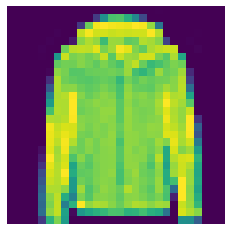

In [6]:
def show_single_image(img_arr):
    '''根据图片像素值数组显示图片'''
    plt.imshow(img_arr)
    plt.axis('off')
    plt.show()
show_single_image(x_train[0])

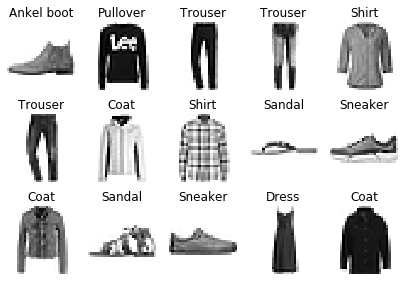

In [7]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.4, n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index],interpolation='nearest', cmap='binary')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']
show_imgs(3, 5, x_test, y_test, class_names)

In [8]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels
x_train_scaled, y_train = normalize(x_train, y_train)
x_valid_scaled, y_valid = normalize(x_valid, y_valid)
x_test_scaled, y_test = normalize(x_test, y_test)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 134us/sample - loss: 0.7226 - accuracy: 0.7599 - val_loss: 0.5015 - val_accuracy: 0.8330
Epoch 2/10
55000/55000 [==============================] - 7s 122us/sample - loss: 0.4868 - accuracy: 0.8302 - val_loss: 0.4750 - val_accuracy: 0.8316
Epoch 3/10
55000/55000 [==============================] - 7s 120us/sample - loss: 0.4419 - accuracy: 0.8446 - val_loss: 0.4295 - val_accuracy: 0.8526
Epoch 4/10
55000/55000 [==============================] - 7s 122us/sample - loss: 0.4137 - accuracy: 0.8560 - val_loss: 0.4007 - val_accuracy: 0.8584
Epoch 5/10
55000/55000 [==============================] - 7s 123us/sample - loss: 0.3942 - accuracy: 0.8619 - val_loss: 0.3863 - val_accuracy: 0.8662
Epoch 6/10
55000/55000 [==============================] - 7s 125us/sample - loss: 0.3772 - accuracy: 0.8665 - val_loss: 0.3704 - val_accuracy: 0.8744
Epoch 7/10
55000/55000 [===========================

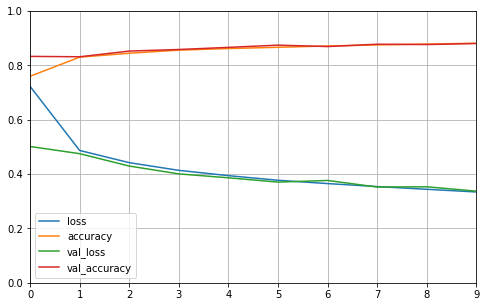

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [13]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.37533448038101197, 0.8673]